In [62]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,precision_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMClassifier
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score
from sklearn.model_selection import KFold
import time
from lightgbm import LGBMClassifier
import lightgbm as lgb

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()


In [7]:
columns = pd.read_csv("census-income.columns",names=["column"])
columns_name =  [i for i in columns['column']]
df = pd.read_csv("C:/Users/rohan/Desktop/uic/Kaggle/Data Challange/census-income.data/census-income.data",names=columns_name)
df.to_csv("patched.csv")
#removing column instance weight MARSUPWT from the data frame.
df.drop(columns=['instance weight MARSUPWT'],axis=1,inplace=True)

# Exploratory Analysis 

In [8]:
# we can see most of thcolumns has catogories so converting them into numerical for analysis.
catogory=[i for i in df.columns if(isinstance(df[i].iloc[0],str)==True)]
catogory
# to check the distribution of categories.
[np.unique(df[i],return_counts=True) for i in catogory]
# creating dummy variable on doing one-hot encoding for featur
cat_num= pd.get_dummies(data=df,columns=catogory)
#Doing label encoding for target variable
le= LabelEncoder()
le.fit(df['gross income target TARGET '])
target=le.transform(df['gross income target TARGET '])
df['Target']=target
df.drop('gross income target TARGET ',axis=1,inplace=True)
cat_num.drop(['gross income target TARGET _ - 50000.','gross income target TARGET _ 50000+.'],axis=1,inplace=True)
cat_num['Target']=df['Target']
cat_num.head()

,age AAGE,industry code ADTIND,occupation code ADTOCC,wage per hour AHRSPAY,capital gains CAPGAIN,capital losses CAPLOSS,divdends from stocks DIVVAL,migration code-change in msa MIGMTR1,family members under 18 PARENT,taxable income amount TAXINC,...,citizenship PRCITSHP_ Yugoslavia,own business or self employed SEOTR_ Foreign born- Not a citizen of U S,own business or self employed SEOTR_ Foreign born- U S citizen by naturalization,own business or self employed SEOTR_ Native- Born abroad of American Parent(s),own business or self employed SEOTR_ Native- Born in Puerto Rico or U S Outlying,own business or self employed SEOTR_ Native- Born in the United States,fill inc questionnaire for veteran's admin VETQVA_ No,fill inc questionnaire for veteran's admin VETQVA_ Not in universe,fill inc questionnaire for veteran's admin VETQVA_ Yes,Target
0,73,0,0,0,0,0,0,1700.09,0,0,...,0,0,0,0,0,1,0,1,0,0
1,58,4,34,0,0,0,0,1053.55,1,0,...,0,0,0,0,0,1,0,1,0,0
2,18,0,0,0,0,0,0,991.95,0,0,...,0,1,0,0,0,0,0,1,0,0
3,9,0,0,0,0,0,0,1758.14,0,0,...,0,0,0,0,0,1,0,1,0,0
4,10,0,0,0,0,0,0,1069.16,0,0,...,0,0,0,0,0,1,0,1,0,0


In [9]:
features = [i for i in cat_num.columns if i !='Target' ]
X= cat_num[features]
y= cat_num['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


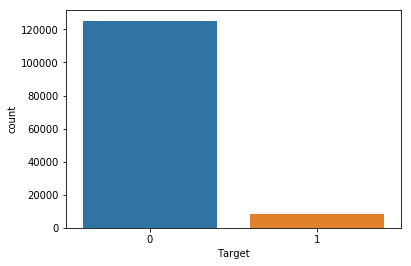

In [10]:
# cheking the count plot of ytrain and y test.
sns.countplot(y_train)
sns.countplot(y_test)


In [11]:
# As we can see that there is uneven distribution of class we will proceed with tree based methodsrather than giving more bias to model
# cheking for nul values
cat_num.isnull().sum()
# no missing value
# Preprocessing the data into Standard scalar
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [9]:
params={'learning_rate': 0.01,
        'objective':'binary',
        'metric':'binary_logloss',
        'num_leaves': 31,
        'bagging_fraction': 0.9,
        'feature_fraction': 0.9,
        "random_state":42,
        'max_depth': 5,
        "bagging_seed" : 42,
        "bagging_frequency" : 5,
        'lambda_l2': 0.5,
        'lambda_l1': 0.5,
        'min_child_samples': 36
       }
lgb=LGBMClassifier(**params)
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(lgb, param_grid)
gridsearch.fit(x_train, y_train,
        eval_set = [(x_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.19973
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924292	valid_0's binary_logloss: 0.186655
[3]	valid_0's auc: 0.92692	valid_0's binary_logloss: 0.177641
[4]	valid_0's auc: 0.927637	valid_0's binary_logloss: 0.170233
[5]	valid_0's auc: 0.929576	valid_0's binary_logloss: 0.164293
[6]	valid_0's auc: 0.932486	valid_0's binary_logloss: 0.159254
[7]	valid_0's auc: 0.934185	valid_0's binary_logloss: 0.155028
[8]	valid_0's auc: 0.935533	valid_0's binary_logloss: 0.151307
[9]	valid_0's auc: 0.936554	valid_0's binary_logloss: 0.147981
[10]	valid_0's auc: 0.937189	valid_0's binary_logloss: 0.145115
[11]	valid_0's auc: 0.938083	valid_0's binary_logloss: 0.142725
[12]	valid_0's auc: 0.938834	valid_0's binary_logloss: 0.140384
[13]	valid_0's auc: 0.939862	valid_0's binary_logloss: 0.138285
[14]	valid_0's auc: 0.9406	valid_0's binary_logloss: 0.136556
[15]	valid_0's auc: 0.941307	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.199838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.9171	valid_0's binary_logloss: 0.186753
[3]	valid_0's auc: 0.925908	valid_0's binary_logloss: 0.177591
[4]	valid_0's auc: 0.926638	valid_0's binary_logloss: 0.170414
[5]	valid_0's auc: 0.929771	valid_0's binary_logloss: 0.164681
[6]	valid_0's auc: 0.932251	valid_0's binary_logloss: 0.159662
[7]	valid_0's auc: 0.933787	valid_0's binary_logloss: 0.155416
[8]	valid_0's auc: 0.935094	valid_0's binary_logloss: 0.151842
[9]	valid_0's auc: 0.935612	valid_0's binary_logloss: 0.148676
[10]	valid_0's auc: 0.936693	valid_0's binary_logloss: 0.14576
[11]	valid_0's auc: 0.937578	valid_0's binary_logloss: 0.143209
[12]	valid_0's auc: 0.937995	valid_0's binary_logloss: 0.141007
[13]	valid_0's auc: 0.939325	valid_0's binary_logloss: 0.138787
[14]	valid_0's auc: 0.939515	valid_0's binary_logloss: 0.137013
[15]	valid_0's auc: 0.940482	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.199779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912885	valid_0's binary_logloss: 0.186565
[3]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.17727
[4]	valid_0's auc: 0.928105	valid_0's binary_logloss: 0.170053
[5]	valid_0's auc: 0.928876	valid_0's binary_logloss: 0.164308
[6]	valid_0's auc: 0.929733	valid_0's binary_logloss: 0.159348
[7]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.155098
[8]	valid_0's auc: 0.933719	valid_0's binary_logloss: 0.151364
[9]	valid_0's auc: 0.934561	valid_0's binary_logloss: 0.148253
[10]	valid_0's auc: 0.935698	valid_0's binary_logloss: 0.145504
[11]	valid_0's auc: 0.936425	valid_0's binary_logloss: 0.14294
[12]	valid_0's auc: 0.937537	valid_0's binary_logloss: 0.140781
[13]	valid_0's auc: 0.938022	valid_0's binary_logloss: 0.13878
[14]	valid_0's auc: 0.939344	valid_0's binary_logloss: 0.136821
[15]	valid_0's auc: 0.940096	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.193823
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924225	valid_0's binary_logloss: 0.180016
[3]	valid_0's auc: 0.927723	valid_0's binary_logloss: 0.170574
[4]	valid_0's auc: 0.93158	valid_0's binary_logloss: 0.162926
[5]	valid_0's auc: 0.933833	valid_0's binary_logloss: 0.157144
[6]	valid_0's auc: 0.935521	valid_0's binary_logloss: 0.152048
[7]	valid_0's auc: 0.936595	valid_0's binary_logloss: 0.147937
[8]	valid_0's auc: 0.937288	valid_0's binary_logloss: 0.144508
[9]	valid_0's auc: 0.937821	valid_0's binary_logloss: 0.141697
[10]	valid_0's auc: 0.939033	valid_0's binary_logloss: 0.139097
[11]	valid_0's auc: 0.939278	valid_0's binary_logloss: 0.137037
[12]	valid_0's auc: 0.939939	valid_0's binary_logloss: 0.135148
[13]	valid_0's auc: 0.940694	valid_0's binary_logloss: 0.133507
[14]	valid_0's auc: 0.940971	valid_0's binary_logloss: 0.132016
[15]	valid_0's auc: 0.942082	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.193946
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.92126	valid_0's binary_logloss: 0.180196
[3]	valid_0's auc: 0.927249	valid_0's binary_logloss: 0.170633
[4]	valid_0's auc: 0.928845	valid_0's binary_logloss: 0.163397
[5]	valid_0's auc: 0.932246	valid_0's binary_logloss: 0.157541
[6]	valid_0's auc: 0.934563	valid_0's binary_logloss: 0.152538
[7]	valid_0's auc: 0.935097	valid_0's binary_logloss: 0.148603
[8]	valid_0's auc: 0.936371	valid_0's binary_logloss: 0.145127
[9]	valid_0's auc: 0.937456	valid_0's binary_logloss: 0.142073
[10]	valid_0's auc: 0.939485	valid_0's binary_logloss: 0.139161
[11]	valid_0's auc: 0.940106	valid_0's binary_logloss: 0.136971
[12]	valid_0's auc: 0.940807	valid_0's binary_logloss: 0.13493
[13]	valid_0's auc: 0.941535	valid_0's binary_logloss: 0.133078
[14]	valid_0's auc: 0.94167	valid_0's binary_logloss: 0.131604
[15]	valid_0's auc: 0.942024	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.193876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.912788	valid_0's binary_logloss: 0.179965
[3]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.170248
[4]	valid_0's auc: 0.929803	valid_0's binary_logloss: 0.162825
[5]	valid_0's auc: 0.931355	valid_0's binary_logloss: 0.157018
[6]	valid_0's auc: 0.932499	valid_0's binary_logloss: 0.152316
[7]	valid_0's auc: 0.936098	valid_0's binary_logloss: 0.148142
[8]	valid_0's auc: 0.936984	valid_0's binary_logloss: 0.144693
[9]	valid_0's auc: 0.937806	valid_0's binary_logloss: 0.141717
[10]	valid_0's auc: 0.938296	valid_0's binary_logloss: 0.139075
[11]	valid_0's auc: 0.938781	valid_0's binary_logloss: 0.136822
[12]	valid_0's auc: 0.939669	valid_0's binary_logloss: 0.134717
[13]	valid_0's auc: 0.940479	valid_0's binary_logloss: 0.132886
[14]	valid_0's auc: 0.941355	valid_0's binary_logloss: 0.131223
[15]	valid_0's auc: 0.941818	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	valid_0's auc: 0.942964	valid_0's binary_logloss: 0.127629
[15]	valid_0's auc: 0.943703	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Did not meet early stopping. Best iteration is:
[32]	valid_0's auc: 0.946963	valid_0's binary_logloss: 0.117481
[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.188339
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925345	valid_0's binary_logloss: 0.174212
[3]	valid_0's auc: 0.92893	valid_0's binary_logloss: 0.164727
[4]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.157236
[5]	valid_0's auc: 0.934827	valid_0's binary_logloss: 0.151556
[6]	valid_0's auc: 0.937492	valid_0's binary_logloss: 0.146729
[7]	valid_0's auc: 0.938286	valid_0's binary_logloss: 0.142742
[8]	valid_0's auc: 0.939573	valid_0's binary_logloss: 0.139562
[9]	valid_0's auc: 0.940298	valid_0's binary_logloss: 0.136627
[10]	valid_0's auc: 0.94062	valid_0's binary_logloss: 0.134273
[11]	valid_0's auc: 0.941301	valid_0's binary_logloss: 0.132273
[12]	valid_0's auc: 0.941884	valid_0's binary_logloss: 0.130547
[13]	valid_0's auc: 0.942348	valid_0's binary_logloss: 0.129061
[14]	v

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.188469
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.174331
[3]	valid_0's auc: 0.928349	valid_0's binary_logloss: 0.164535
[4]	valid_0's auc: 0.929753	valid_0's binary_logloss: 0.157572
[5]	valid_0's auc: 0.932182	valid_0's binary_logloss: 0.151958
[6]	valid_0's auc: 0.935172	valid_0's binary_logloss: 0.147037
[7]	valid_0's auc: 0.93666	valid_0's binary_logloss: 0.1432
[8]	valid_0's auc: 0.93794	valid_0's binary_logloss: 0.139934
[9]	valid_0's auc: 0.938378	valid_0's binary_logloss: 0.137327
[10]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.134766
[11]	valid_0's auc: 0.941179	valid_0's binary_logloss: 0.132627
[12]	valid_0's auc: 0.9417	valid_0's binary_logloss: 0.130921
[13]	valid_0's auc: 0.942212	valid_0's binary_logloss: 0.129311
[14]	valid_0's auc: 0.942599	valid_0's binary_logloss: 0.12804
[15]	valid_0's auc: 0.942862	valid_0's binary_logloss: 0.12

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.188391
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.915078	valid_0's binary_logloss: 0.174014
[3]	valid_0's auc: 0.926671	valid_0's binary_logloss: 0.164357
[4]	valid_0's auc: 0.930309	valid_0's binary_logloss: 0.1572
[5]	valid_0's auc: 0.933015	valid_0's binary_logloss: 0.151448
[6]	valid_0's auc: 0.934507	valid_0's binary_logloss: 0.146812
[7]	valid_0's auc: 0.93749	valid_0's binary_logloss: 0.142782
[8]	valid_0's auc: 0.938133	valid_0's binary_logloss: 0.139512
[9]	valid_0's auc: 0.938758	valid_0's binary_logloss: 0.136857
[10]	valid_0's auc: 0.939742	valid_0's binary_logloss: 0.134548
[11]	valid_0's auc: 0.940558	valid_0's binary_logloss: 0.132455
[12]	valid_0's auc: 0.94141	valid_0's binary_logloss: 0.130589
[13]	valid_0's auc: 0.942132	valid_0's binary_logloss: 0.128889
[14]	valid_0's auc: 0.942454	valid_0's binary_logloss: 0.127618
[15]	valid_0's auc: 0.942977	valid_0's binary_logloss: 0.

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Did not meet early stopping. Best iteration is:
[28]	valid_0's auc: 0.946576	valid_0's binary_logloss: 0.117635
[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	va

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.18333
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925481	valid_0's binary_logloss: 0.169176
[3]	valid_0's auc: 0.930168	valid_0's binary_logloss: 0.159607
[4]	valid_0's auc: 0.933009	valid_0's binary_logloss: 0.152381
[5]	valid_0's auc: 0.935223	valid_0's binary_logloss: 0.146991
[6]	valid_0's auc: 0.937805	valid_0's binary_logloss: 0.142357
[7]	valid_0's auc: 0.938654	valid_0's binary_logloss: 0.138778
[8]	valid_0's auc: 0.93982	valid_0's binary_logloss: 0.135525
[9]	valid_0's auc: 0.940656	valid_0's binary_logloss: 0.133026
[10]	valid_0's auc: 0.941403	valid_0's binary_logloss: 0.13095
[11]	valid_0's auc: 0.941871	valid_0's binary_logloss: 0.129103
[12]	valid_0's auc: 0.942623	valid_0's binary_logloss: 0.127416
[13]	valid_0's auc: 0.943005	valid_0's binary_logloss: 0.126071
[14]	valid_0's auc: 0.943295	valid_0's binary_logloss: 0.125081
[15]	valid_0's auc: 0.944014	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.183458
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.924942	valid_0's binary_logloss: 0.169202
[3]	valid_0's auc: 0.929531	valid_0's binary_logloss: 0.15958
[4]	valid_0's auc: 0.930783	valid_0's binary_logloss: 0.152652
[5]	valid_0's auc: 0.933308	valid_0's binary_logloss: 0.147322
[6]	valid_0's auc: 0.935358	valid_0's binary_logloss: 0.142893
[7]	valid_0's auc: 0.936511	valid_0's binary_logloss: 0.1393
[8]	valid_0's auc: 0.937637	valid_0's binary_logloss: 0.136304
[9]	valid_0's auc: 0.938388	valid_0's binary_logloss: 0.133861
[10]	valid_0's auc: 0.939587	valid_0's binary_logloss: 0.131604
[11]	valid_0's auc: 0.940638	valid_0's binary_logloss: 0.12954
[12]	valid_0's auc: 0.941282	valid_0's binary_logloss: 0.127914
[13]	valid_0's auc: 0.941824	valid_0's binary_logloss: 0.126686
[14]	valid_0's auc: 0.942544	valid_0's binary_logloss: 0.125221
[15]	valid_0's auc: 0.942931	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.183376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.923478	valid_0's binary_logloss: 0.16898
[3]	valid_0's auc: 0.928438	valid_0's binary_logloss: 0.159206
[4]	valid_0's auc: 0.930185	valid_0's binary_logloss: 0.152334
[5]	valid_0's auc: 0.934169	valid_0's binary_logloss: 0.146553
[6]	valid_0's auc: 0.935384	valid_0's binary_logloss: 0.142218
[7]	valid_0's auc: 0.937996	valid_0's binary_logloss: 0.138389
[8]	valid_0's auc: 0.938972	valid_0's binary_logloss: 0.135246
[9]	valid_0's auc: 0.940139	valid_0's binary_logloss: 0.132809
[10]	valid_0's auc: 0.940898	valid_0's binary_logloss: 0.130758
[11]	valid_0's auc: 0.941782	valid_0's binary_logloss: 0.128776
[12]	valid_0's auc: 0.942049	valid_0's binary_logloss: 0.12748
[13]	valid_0's auc: 0.942562	valid_0's binary_logloss: 0.126084
[14]	valid_0's auc: 0.943266	valid_0's binary_logloss: 0.124709
[15]	valid_0's auc: 0.943583	valid_0's binary_logloss: 

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.914228	valid_0's binary_logloss: 0.178836
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925463	valid_0's binary_logloss: 0.164805
[3]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.155535
[4]	valid_0's auc: 0.933398	valid_0's binary_logloss: 0.148708
[5]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.143358
[6]	valid_0's auc: 0.938039	valid_0's binary_logloss: 0.138935
[7]	valid_0's auc: 0.939438	valid_0's binary_logloss: 0.135528
[8]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.13281
[9]	valid_0's auc: 0.941431	valid_0's binary_logloss: 0.130117
[10]	valid_0's auc: 0.94218	valid_0's binary_logloss: 0.128302
[11]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.126525
[12]	valid_0's auc: 0.943543	valid_0's binary_logloss: 0.125137
[13]	valid_0's auc: 0.943814	valid_0's binary_logloss: 0.124081
[14]	valid_0's auc: 0.94432	valid_0's binary_logloss: 0.122922
[15]	valid_0's auc: 0.94464	valid_0's binary_logloss: 0

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.178953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925979	valid_0's binary_logloss: 0.164965
[3]	valid_0's auc: 0.928599	valid_0's binary_logloss: 0.155501
[4]	valid_0's auc: 0.931764	valid_0's binary_logloss: 0.148578
[5]	valid_0's auc: 0.934778	valid_0's binary_logloss: 0.143419
[6]	valid_0's auc: 0.936724	valid_0's binary_logloss: 0.139086
[7]	valid_0's auc: 0.938084	valid_0's binary_logloss: 0.135812
[8]	valid_0's auc: 0.939826	valid_0's binary_logloss: 0.132869
[9]	valid_0's auc: 0.940407	valid_0's binary_logloss: 0.1306
[10]	valid_0's auc: 0.941605	valid_0's binary_logloss: 0.128474
[11]	valid_0's auc: 0.942022	valid_0's binary_logloss: 0.126964
[12]	valid_0's auc: 0.942674	valid_0's binary_logloss: 0.125498
[13]	valid_0's auc: 0.942966	valid_0's binary_logloss: 0.124473
[14]	valid_0's auc: 0.943494	valid_0's binary_logloss: 0.123359
[15]	valid_0's auc: 0.943994	valid_0's binary_logloss:

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.90289	valid_0's binary_logloss: 0.178873
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.164364
[3]	valid_0's auc: 0.928389	valid_0's binary_logloss: 0.155129
[4]	valid_0's auc: 0.934297	valid_0's binary_logloss: 0.148079
[5]	valid_0's auc: 0.936047	valid_0's binary_logloss: 0.142596
[6]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.138613
[7]	valid_0's auc: 0.938946	valid_0's binary_logloss: 0.135148
[8]	valid_0's auc: 0.939903	valid_0's binary_logloss: 0.132216
[9]	valid_0's auc: 0.940662	valid_0's binary_logloss: 0.130281
[10]	valid_0's auc: 0.941559	valid_0's binary_logloss: 0.128328
[11]	valid_0's auc: 0.942131	valid_0's binary_logloss: 0.126794
[12]	valid_0's auc: 0.942812	valid_0's binary_logloss: 0.125656
[13]	valid_0's auc: 0.943216	valid_0's binary_logloss: 0.124706
[14]	valid_0's auc: 0.943952	valid_0's binary_logloss: 0.123324
[15]	valid_0's auc: 0.944295	valid_0's binary_logloss

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.902061	valid_0's binary_logloss: 0.178684
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.925586	valid_0's binary_logloss: 0.164397
[3]	valid_0's auc: 0.931367	valid_0's binary_logloss: 0.155289
[4]	valid_0's auc: 0.934179	valid_0's binary_logloss: 0.148129
[5]	valid_0's auc: 0.935511	valid_0's binary_logloss: 0.14279
[6]	valid_0's auc: 0.936691	valid_0's binary_logloss: 0.138692
[7]	valid_0's auc: 0.939638	valid_0's binary_logloss: 0.134898
[8]	valid_0's auc: 0.940351	valid_0's binary_logloss: 0.132237
[9]	valid_0's auc: 0.941193	valid_0's binary_logloss: 0.129996
[10]	valid_0's auc: 0.942066	valid_0's binary_logloss: 0.128085
[11]	valid_0's auc: 0.942597	valid_0's binary_logloss: 0.126406
[12]	valid_0's auc: 0.943067	valid_0's binary_logloss: 0.125163
[13]	valid_0's auc: 0.943617	valid_0's binary_logloss: 0.123908
[14]	valid_0's auc: 0.944199	valid_0's binary_logloss: 0.12275
[15]	valid_0's auc: 0.944663	valid_0's binary_logloss:

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(bagging_fraction=0.9, bagging_frequency=5, bagging_seed=42,
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.9, importance_type='split', lambda_l1=0.5,
        lambda_l2=0.5, learning_rate=0.01, max_depth=5,
        metric='bi...0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
from sklearn.externals import joblib
joblib.dump(gridsearch.best_estimator_, 'model_1.pkl')

['model_1.pkl']

In [12]:
model = LGBMClassifier(bagging_fraction=0.9, bagging_frequency=5, bagging_seed=42,
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.9, importance_type='split', lambda_l1=0.5,
        lambda_l2=0.5, learning_rate=0.2, max_depth=5,
        metric='binary_logloss', min_child_samples=36,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=34,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [16]:
model.fit(x_train,y_train)

LGBMClassifier(bagging_fraction=0.9, bagging_frequency=5, bagging_seed=42,
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.9, importance_type='split', lambda_l1=0.5,
        lambda_l2=0.5, learning_rate=0.2, max_depth=5,
        metric='binary_logloss', min_child_samples=36,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=34,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [18]:
predict = model.predict(x_test)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5,1,'The precision score :0.743')

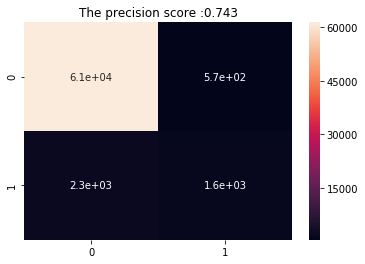

In [25]:
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True)
plt.title('The precision score :{0:.3f}'.format(precision_score(y_test,predict)))

In [27]:
print(classification_report(y_test,predict))


             precision    recall  f1-score   support

          0       0.96      0.99      0.98     61906
          1       0.74      0.42      0.53      3937

avg / total       0.95      0.96      0.95     65843



Text(0.5,1,'Area under ROC curve is.87.92')

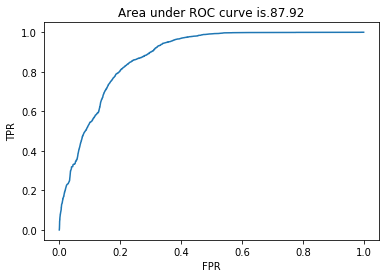

In [70]:
#Plotting ROC curve
predictions = model.predict_proba(X_test)  
roc_auc_score(y_test,predictions[:,1])
fpr, tpr, thresholds  = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area under ROC curve is.{}'.format(round(roc_auc_score(y_test,predictions[:,1])*100,2)))

array([1.99298237e+00, 9.92982374e-01, 9.89744036e-01, ...,
       1.74894503e-03, 1.67547129e-03, 1.40709802e-03])